# Programming Exercise 1: Linear Regression

## 1. Introduction

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

To get started with the exercise, you will need to download the starter code and unzip its contents to the directory where you wish to complete the exercise. If needed, use the cd command in Octave/MATLAB to change to this directory before starting this exercise.

You can also ﬁnd instructions for installing Python down below. These notebooks use Python 3.6 but should be compatible with Python 2 as well

## Files included in this exercise

ex1.m - Octave/MATLAB script that steps you through the exercise ex1 

multi.m - Octave/MATLAB script for the later parts of the exercise 

ex1data1.txt - Dataset for linear regression with one variable 

ex1data2.txt - Dataset for linear regression with multiple variables 

submit.m - Submission script that sends your solutions to our servers 

\[*] warmUpExercise.m - Simple example function in Octave/MATLAB 

\[*] plotData.m - Function to display the dataset 

\[*] computeCost.m - Function to compute the cost of linear regression 

\[*] gradientDescent.m - Function to run gradient descent 

\[†] computeCostMulti.m - Cost function for multiple variables 

\[†] gradientDescentMulti.m - Gradient descent for multiple variables 

\[†] featureNormalize.m - Function to normalize features 

\[†] normalEqn.m - Function to compute the normal equations 

\* indicates ﬁles you will need to complete 

† indicates optional exercises

Throughout the exercise, you will be using the scripts ex1.m and ex1 multi.m. These scripts set up the dataset for the problems and make calls to functions that you will write. You do not need to modify either of them. You are only required to modify functions in other ﬁles, by following the instructions in this assignment. 
For this programming exercise, you are only required to complete the ﬁrst part of the exercise to implement linear regression with one variable. The second part of the exercise, which is optional, covers linear regression with multiple variables.

## 2. Linear Regression with One Variable

In this part of this exercise, you will implement linear regression with one variable to predict proﬁts for a food truck. Suppose you are the CEO of a restaurant franchise and are considering diﬀerent cities for opening a new outlet. The chain already has trucks in various cities and you have data for proﬁts and populations from the cities. 

You would like to use this data to help you select which city to expand to next. 

The ﬁle **ex1data1.txt** contains the dataset for our linear regression problem. The ﬁrst column is the population of a city and the second column is the proﬁt of a food truck in that city. A negative value for proﬁt indicates a loss. The **ex1.py** script has already been set up to load this data for you.

## 2.1 Plotting the data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (proﬁt and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.) 

In **ex1.py**, the dataset is loaded from the data ﬁle into the variables X and y:

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import plotData
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import warmUpExercise as wue
import computeCost as cc
#import gradientDescent as gd

In [3]:
data = np.loadtxt('ex1data1.txt', delimiter=",")
X = data[:,0]
y = data[:,1]
m = len(y) # number of training examples

Next, the script calls the plotData function to create a scatter plot of the data. Your job is to complete plotData.py to draw the plot; modify the ﬁle and ﬁll in the following code:

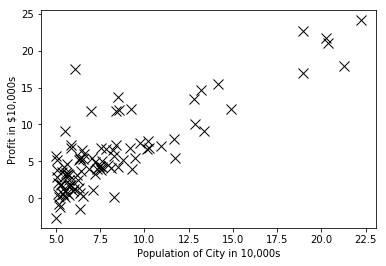

In [9]:
plt.plot(X,y,'kx', markersize=10, label='Training data') 
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s') 
plt.show()

## 2.2 Gradient Descent
In this part, you will ﬁt the linear regression parameters θ to our dataset using gradient descent.

### 2.2.1 Update Equations
![costfunctionGradientDescent](images/costfunctionGradientDescent.png)

### 2.2.2 Implementation
In **ex1.py**, we have already set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the θ0 intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

In [11]:
X_padded = np.column_stack((np.ones((m,1)), X)) # Add a column of ones to x
theta = np.zeros((2, 1)) # initialize fitting parameters

# Some gradient descent settings
iterations = 1500
alpha = 0.01

### 2.2.3 Computing the Cost J(θ)
As you perform gradient descent to learn minimize the cost function J(θ), it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate J(θ) so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code in the ﬁle **computeCost.py**, which is a function that computes J(θ). As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set. 
Once you have completed the function, the next step in ex1.m will run computeCost once using θ initialized to zeros, and you will see the cost printed to the screen. You should expect to see a cost of 32.07

### 2.2.4 Gradient Descent
Next, you will implement gradient descent in the ﬁle gradientDescent.m. The loop structure has been written for you, and you only need to supply the updates to θ within each iteration.

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost J(θ) is parameterized by the vector θ, not X and y. That is, we minimize the value of J(θ) by changing the values of the vector θ, not by changing X or y. Refer to the equations in this handout and to the video lectures if you are uncertain. 
A good way to verify that gradient descent is working correctly is to look at the value of J(θ) and check that it is decreasing with each step. The starter code for **gradientDescent.py** calls computeCost on every iteration and prints the cost. Assuming you have implemented gradient descent and computeCost correctly, your value of J(θ) should never increase, and should converge to a steady value by the end of the algorithm. 
After you are ﬁnished, **ex1.py** will use your ﬁnal parameters to plot the linear ﬁt. The result should look something like Figure 2: Your ﬁnal values for θ will also be used to make predictions on proﬁts in areas of 35,000 and 70,000 people. Note the way that the following lines in ex1.m uses matrix multiplication, rather than explicit summation or looping, to calculate the predictions. This is an example of code vectorization in Python

In [12]:
predict1 = np.array([1, 3.5]).dot(theta)
predict2 = np.array([1, 7]).dot(theta)

## 2.4 Visualizing J(θ)
To understand the cost function J(θ) better, you will now plot the cost over a 2-dimensional grid of θ0 and θ1 values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next step of **ex1.py**, there is code set up to calculate J(θ) over a grid of values using the computeCost function that you wrote.

In [13]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [[theta0_vals[i]], [theta1_vals[j]]]
        J_vals[i,j] = cc.computeCost(X_padded, y, t)

After these lines are executed, you will have a 2-D array of J(θ) values. The script ex1.py will then use these values to produce surface and contour plots of J(θ) using the surf and contour commands.

## Fix HeatMap by going over old heatmap tutorial
https://github.com/mGalarnyk/Python_Tutorials/blob/master/Request/Heat%20Maps%20using%20Matplotlib%20and%20Seaborn.ipynb